<a href="https://colab.research.google.com/github/HTxSlayer/AI-Powered-Mental-Health-Assistant/blob/main/gloves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/gloves.v1i.yolov8.zip" -d "/content/notes"

Streaming output truncated to the last 5000 lines.
  inflating: /content/notes/train/labels/image_294_jpg.rf.05615cdf73ae1cbceecf4a39f6d700f2.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.5eaea7602c943dab7427fb6c609ca5f7.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.60537eb8c6cc9e85001da655b80d4f6b.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.76a1a482107ea955493d17b307286dd0.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.7e05f2f2d003c605a2fb22b783242170.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.bbb0084424d8be568439718b2071a8da.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.d6fef54458249f169d6716360450e6b2.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.e93980c78f831546087910d0407646e5.txt  
  inflating: /content/notes/train/labels/image_295_jpg.rf.3e3e4d866c00f5fa5d2255c5e10806c4.txt  
  inflating: /content/notes/train/labels/image_295_jpg.rf.784dfab7f75bd9c48e

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.0 MB/s eta 0:00:00


In [ ]:
# example: 50 epochs, img size 640, batch 16 (adjust to your GPU)
!yolo task=detect mode=train model=yolov8n.pt data=/content/notes/data.yaml epochs=50 imgsz=640 batch=32


Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/notes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Upload an image file (jpg/png)...


Saving download.jpg to download.jpg

image 1/1 /content/download.jpg: 448x640 1 gloves, 66.2ms
Speed: 10.6ms preprocess, 66.2ms inference, 39.1ms postprocess per image at shape (1, 3, 448, 640)


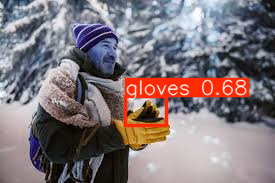

1. gloves  conf=0.679  bbox=[125.71855163574219, 96.23989868164062, 166.2169189453125, 125.0478515625]


In [3]:
# Colab: upload an image, run YOLOv8 model, show annotated result + detections
from google.colab import files
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# 1) Upload image
print("Upload an image file (jpg/png)...")
up = files.upload()
img_path = list(up.keys())[0]   # filename in current dir

# 2) load your trained model (change path if needed)
model = YOLO("/content/last.pt")  # or path/to/your/best.pt

# 3) predict
results = model.predict(source=img_path, conf=0.10, save=False)  # set save=True to save annotated image

# 4) show annotated image (Ultralytics results provide .plot())
annotated = results[0].plot()   # returns a numpy array
display(Image.fromarray(annotated))

# 5) print detections (class id, name, confidence, bbox)
names = {0: "gloves", 1: "no_gloves"}   # change if different
boxes = results[0].boxes  # Boxes object
if boxes is None or len(boxes) == 0:
    print("No detections.")
else:
    for i,box in enumerate(boxes):
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        xyxy = box.xyxy[0].tolist()  # [x1,y1,x2,y2]
        print(f"{i+1}. {names.get(cls,cls)}  conf={conf:.3f}  bbox={xyxy}")


Upload an image file (jpg/png)...


Saving 74_png_jpg.rf.9915d2c2fbea54e783c95fce19b14e4a.jpg to 74_png_jpg.rf.9915d2c2fbea54e783c95fce19b14e4a.jpg

image 1/1 /content/74_png_jpg.rf.9915d2c2fbea54e783c95fce19b14e4a.jpg: 384x640 10 glovess, 38.6ms
Speed: 1.5ms preprocess, 38.6ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)


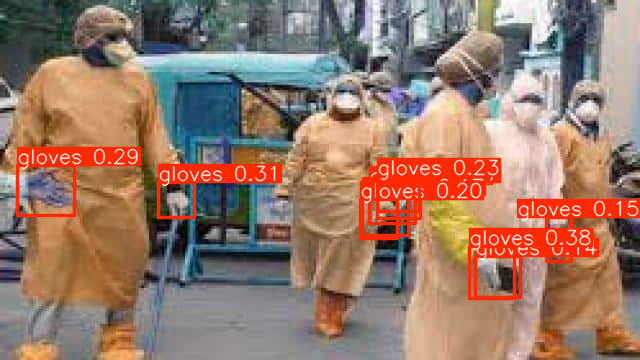

1. gloves  conf=0.378  bbox=[469.50836181640625, 246.27984619140625, 514.0345458984375, 298.41009521484375]
2. gloves  conf=0.312  bbox=[158.06948852539062, 182.40359497070312, 194.3778076171875, 217.379150390625]
3. gloves  conf=0.289  bbox=[17.908845901489258, 165.14352416992188, 74.0150146484375, 215.40505981445312]
4. gloves  conf=0.228  bbox=[377.77947998046875, 176.9003143310547, 419.06298828125, 211.07078552246094]
5. gloves  conf=0.197  bbox=[360.37713623046875, 199.93258666992188, 397.88873291015625, 238.98553466796875]
6. gloves  conf=0.171  bbox=[362.6500244140625, 195.67178344726562, 408.6278076171875, 235.11984252929688]
7. gloves  conf=0.169  bbox=[377.04925537109375, 182.77169799804688, 420.73846435546875, 218.79714965820312]
8. gloves  conf=0.149  bbox=[546.4464721679688, 217.95379638671875, 571.3291625976562, 261.1514892578125]
9. gloves  conf=0.137  bbox=[475.2388916015625, 256.080322265625, 520.8121337890625, 297.839599609375]
10. gloves  conf=0.124  bbox=[369.524108

In [4]:
# Colab: upload an image, run YOLOv8 model, show annotated result + detections
from google.colab import files
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# 1) Upload image
print("Upload an image file (jpg/png)...")
up = files.upload()
img_path = list(up.keys())[0]   # filename in current dir

# 2) load your trained model (change path if needed)
model = YOLO("/content/last.pt")  # or path/to/your/best.pt

# 3) predict
results = model.predict(source=img_path, conf=0.10, save=False)  # set save=True to save annotated image

# 4) show annotated image (Ultralytics results provide .plot())
annotated = results[0].plot()   # returns a numpy array
display(Image.fromarray(annotated))

# 5) print detections (class id, name, confidence, bbox)
names = {0: "gloves", 1: "no_gloves"}   # change if different
boxes = results[0].boxes  # Boxes object
if boxes is None or len(boxes) == 0:
    print("No detections.")
else:
    for i,box in enumerate(boxes):
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        xyxy = box.xyxy[0].tolist()  # [x1,y1,x2,y2]
        print(f"{i+1}. {names.get(cls,cls)}  conf={conf:.3f}  bbox={xyxy}")


Upload an image file (jpg/png)...


Saving 425_jpg.rf.6faf355f82be29a58d11ebc033d2add7.jpg to 425_jpg.rf.6faf355f82be29a58d11ebc033d2add7.jpg

image 1/1 /content/425_jpg.rf.6faf355f82be29a58d11ebc033d2add7.jpg: 384x640 5 no_glovess, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


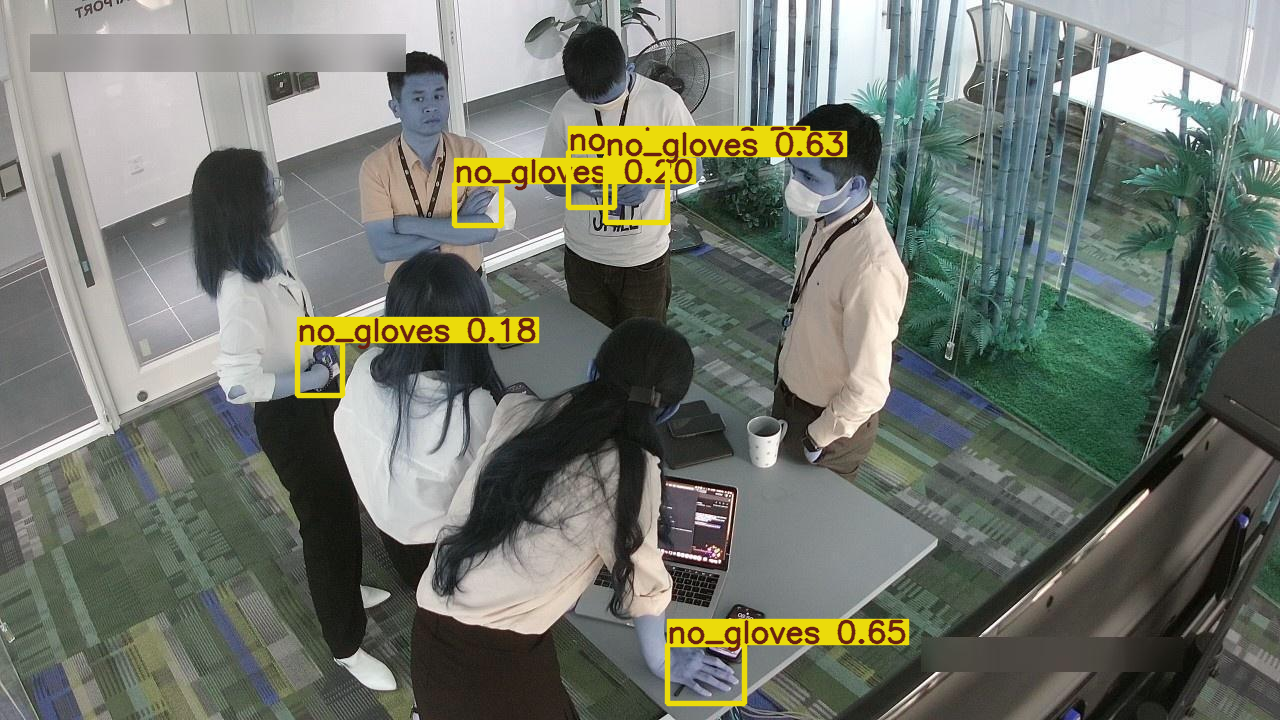

1. no_gloves  conf=0.652  bbox=[667.5863037109375, 644.4757080078125, 744.5667724609375, 703.5677490234375]
2. no_gloves  conf=0.630  bbox=[605.7755737304688, 156.9300537109375, 667.5442504882812, 222.2694091796875]
3. no_gloves  conf=0.573  bbox=[568.2220458984375, 151.85218811035156, 614.739501953125, 207.42335510253906]
4. no_gloves  conf=0.198  bbox=[454.19476318359375, 183.17849731445312, 501.32171630859375, 225.40255737304688]
5. no_gloves  conf=0.181  bbox=[297.2625732421875, 342.59161376953125, 342.7947998046875, 395.95001220703125]


In [5]:
# Colab: upload an image, run YOLOv8 model, show annotated result + detections
from google.colab import files
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# 1) Upload image
print("Upload an image file (jpg/png)...")
up = files.upload()
img_path = list(up.keys())[0]   # filename in current dir

# 2) load your trained model (change path if needed)
model = YOLO("/content/last.pt")  # or path/to/your/best.pt

# 3) predict
results = model.predict(source=img_path, conf=0.10, save=False)  # set save=True to save annotated image

# 4) show annotated image (Ultralytics results provide .plot())
annotated = results[0].plot()   # returns a numpy array
display(Image.fromarray(annotated))

# 5) print detections (class id, name, confidence, bbox)
names = {0: "gloves", 1: "no_gloves"}   # change if different
boxes = results[0].boxes  # Boxes object
if boxes is None or len(boxes) == 0:
    print("No detections.")
else:
    for i,box in enumerate(boxes):
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        xyxy = box.xyxy[0].tolist()  # [x1,y1,x2,y2]
        print(f"{i+1}. {names.get(cls,cls)}  conf={conf:.3f}  bbox={xyxy}")
